# Exploration Exercises

In [1]:
# ignore warnings
import warnings
warnings.filterwarnings("ignore")

# Wrangling
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split

# Statistical Tests
import scipy.stats as stats

# Visualizing
import matplotlib.pyplot as plt
from matplotlib import cm
import seaborn as sns
from sklearn.model_selection import learning_curve

# Modules
import env
import wrangle_zillow as w

pd.options.display.float_format = '{:20,.2f}'.format
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)

In [2]:
df = w.get_zillow_data()

In [3]:
df.shape

(77613, 69)

In [4]:
single_use = [261, 262, 263, 264, 266, 268, 273, 276, 279]

In [6]:
def handle_missing_values(df, prop_required_column = .5, prop_required_row = .70):
    threshold = int(round(prop_required_column*len(df.index),0))
    df.dropna(axis=1, thresh=threshold, inplace=True)
    threshold = int(round(prop_required_row*len(df.columns),0))
    df.dropna(axis=0, thresh=threshold, inplace=True)
    return df

In [7]:
df = handle_missing_values(df, prop_required_column = .5, prop_required_row = .70)

In [8]:
df.shape

(77565, 35)

In [10]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 77565 entries, 0 to 77612
Data columns (total 35 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   propertylandusetypeid         77565 non-null  float64
 1   heatingorsystemtypeid         49571 non-null  float64
 2   parcelid                      77565 non-null  int64  
 3   id                            77565 non-null  int64  
 4   bathroomcnt                   77565 non-null  float64
 5   bedroomcnt                    77565 non-null  float64
 6   buildingqualitytypeid         49809 non-null  float64
 7   calculatedbathnbr             76963 non-null  float64
 8   calculatedfinishedsquarefeet  77378 non-null  float64
 9   finishedsquarefeet12          73923 non-null  float64
 10  fips                          77565 non-null  float64
 11  fullbathcnt                   76963 non-null  float64
 12  latitude                      77565 non-null  float64
 13  l

Cleaning the data

* impute calculated bath n br by adding the bedroom and bathroom counts

In [17]:
df = df.drop(columns = ['id', 'id.1','finishedsquarefeet12', 'fullbathcnt', 'heatingorsystemtypeid', 'heatingorsystemdesc',
       'propertycountylandusecode', 'propertylandusetypeid','propertyzoningdesc', 'censustractandblock', 'propertylandusedesc', 'unitcnt'])

In [18]:
df.shape

(77565, 24)

In [19]:
df.isnull().sum()

parcelid                            0
bathroomcnt                         0
bedroomcnt                          0
buildingqualitytypeid           27756
calculatedbathnbr                 602
calculatedfinishedsquarefeet      187
fips                                0
latitude                            0
longitude                           0
lotsizesquarefeet                8245
rawcensustractandblock              0
regionidcity                     1465
regionidcounty                      0
regionidzip                        45
roomcnt                             0
yearbuilt                         256
structuretaxvaluedollarcnt        111
taxvaluedollarcnt                   1
assessmentyear                      0
landtaxvaluedollarcnt               1
taxamount                           5
logerror                            0
transactiondate                     0
heatingorsystemdesc             27994
dtype: int64

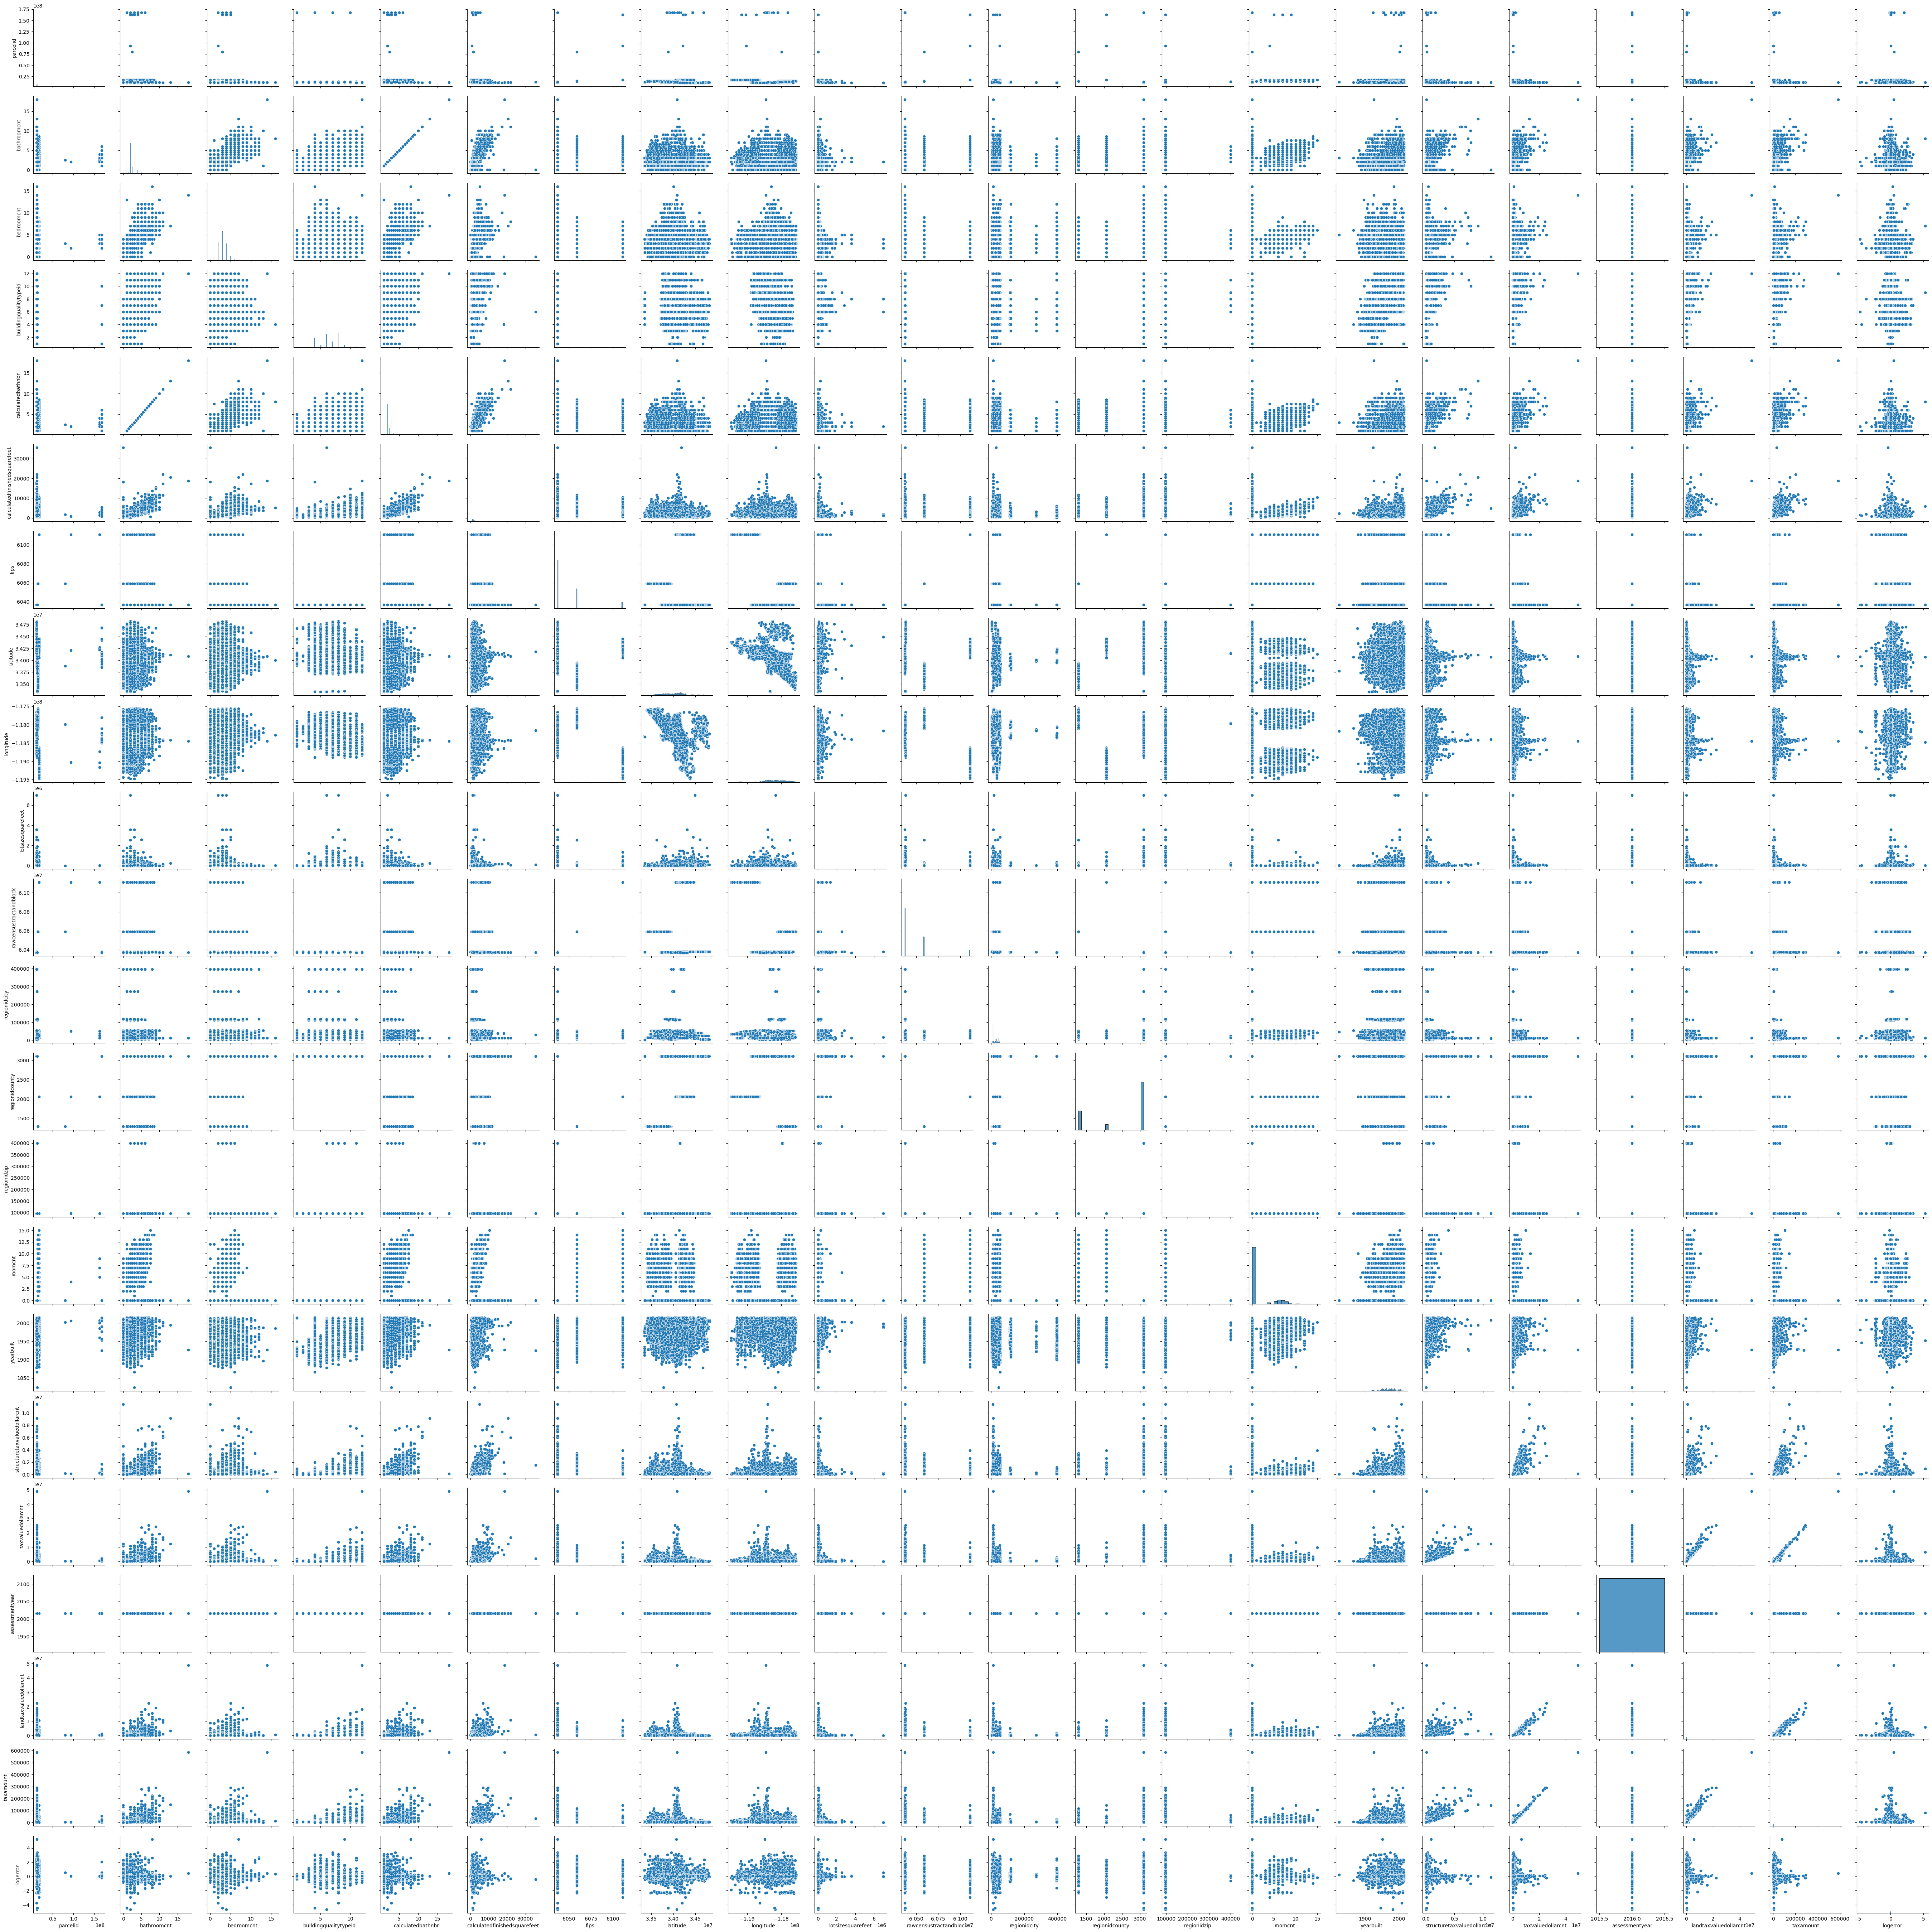

In [20]:
sns.pairplot(df)